# TPN°2: Análisis Exploratorio y Curación de Datos

In [1]:
# Listado de variables utilizadas en la entrega 1
# 'id'
# 'cod_provincia'
# 'region'
# 'tamanio_aglomerado'
# 'aglomerado'
# 'localidades_150'
# 'submuestra'
# 'rango_ingreso'
# 'Sexo_Respondente'
# 'rango_edad'
# 'Cob_Salud'
# 'control_mamografia'
# 'control_pap'
# 'control_colon'
# "edad",
# "altura",                       --> analizada 
# "peso",                         --> analizada
# "imc",                          --> analizada
# "imc_cat",
# "glucosa",
# "colesterol"
# ta_elevada                      --> analizada
# 'promedio_sistolica',           --> analizada
# 'promedio_diastolica'           --> analizada
# 'rango_ingreso': 'rango_ingreso',
# 'asistencia',
# 'ausentismo',
# 'sit_laboral',
# 'autop_gral',
# 'mov_sg',
# 'cuidado_sg',
# 'actcot_sg',
# 'dolor_sg',
# 'ansxdepr_sg',
# 'barreras_actividad_fisica',
# 'barr_af',
# 'alerta_pc',
# 'imc_categorias',
# 'tipo_dieta_razones',
# 'ult_med_co',
# 'prevalencia_colesterol',
# 'val_elev_di',
# 'tto_di',
# 'ult_med_di',
# 'lugar_atencion',
# 'mismo_medico'
# "consumo_minimo_fv"    --> analizada
# "percepcion_dieta",    --> analizada
# "dias_consumo_frutas", --> analizada
# "dias_consumo_verduras" --> analizada




In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import seaborn
seaborn.set_context('talk')
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler

In [3]:
url='https://raw.githubusercontent.com/Freinoso95/Diplo2023/main/ENFR2018_2.csv'
df=pd.read_csv(url,delimiter=';')
df_original = df.copy()

In [4]:
#Renombramos columnas para continuar trabajando con los mismos nombres
renombrar_columnas={'cobertura_salud':'Cob_Salud',
                    "bhch03":"sexo",
                    "bhch04": "edad",
                    "bima07":"altura",
                    "bima10":"peso",
                    "imc_bima": "imc_medant", 
                    "imc_categorias_bima": "imc_cat",
                    "bimq05":"glucosa",
                    "bimq06":"colesterol",
                    'rango_ingreso': 'rango_ingreso',
                    'bhih03': 'asistencia',
                    'bisl03': 'ausentismo',
                    'condicion_actividad':'sit_laboral',
                    'bisg01': 'autop_gral',
                    'bisg02': 'mov_sg',
                    'bisg03': 'cuidado_sg',
                    'bisg04': 'actcot_sg',
                    'bisg05': 'dolor_sg',
                    'bisg06': 'ansxdepr_sg',
                    'barreras_actividad_fisica': 'barreras_actividad_fisica',
                    'biha02': 'barr_af',
                    'bipc01': 'alerta_pc',
                    'imc_categorias':'imc_categorias',
                    'tipo_dieta_razones': 'tipo_dieta_razones',
                    'bico02': 'ult_med_co',
                    'prevalencia_colesterol': 'prevalencia_colesterol',
                    'bidi01': 'val_elev_di',
                    'bidi03': 'tto_di',
                    'bidi07': 'ult_med_di',
                    'bidi09': 'lugar_atencion',
                    'bidi10': 'mismo_medico',
                    "consumo_fv":"consumo_minimo_fv",
                    "bial08":"percepcion_dieta",
                    "bial03":"dias_consumo_frutas",
                    "bial05":"dias_consumo_verduras"}

In [5]:
col_filtradas=['id',
 'cod_provincia',
 'region',
 'tamanio_aglomerado',
 'aglomerado',
 'localidades_150',
 'submuestra',
 'rango_ingreso',
 'sexo',
 'rango_edad',
 'Cob_Salud',
 'control_mamografia',
 'control_pap',
 'control_colon',
 'edad',
 'altura',
 'peso',
 'imc',
 'imc_medant',
 'imc_cat',
 'glucosa',
 'colesterol',
 'ta_elevada',
 'promedio_sistolica',
 'promedio_diastolica',
 'asistencia',
 'ausentismo',
 'sit_laboral',
 'autop_gral',
 'mov_sg',
 'cuidado_sg',
 'actcot_sg',
 'dolor_sg',
 'ansxdepr_sg',
 'barreras_actividad_fisica',
 'barr_af',
 'alerta_pc',
 'imc_categorias',
 'tipo_dieta_razones',
 'ult_med_co',
 'prevalencia_colesterol',
 'val_elev_di',
 'tto_di',
 'ult_med_di',
 'lugar_atencion',
 'mismo_medico',
 'consumo_minimo_fv',    
 'percepcion_dieta',
 'dias_consumo_frutas',
 'dias_consumo_verduras']

In [6]:
df_original=df_original.rename(columns=renombrar_columnas)
df_filtrado=df_original[col_filtradas]


In [7]:
df_filtrado

,id,cod_provincia,region,tamanio_aglomerado,aglomerado,localidades_150,submuestra,rango_ingreso,sexo,rango_edad,...,prevalencia_colesterol,val_elev_di,tto_di,ult_med_di,lugar_atencion,mismo_medico,consumo_minimo_fv,percepcion_dieta,dias_consumo_frutas,dias_consumo_verduras
0,1128639,2,1,1,1,1,1,NaN,1,2,...,2.0,2,NaN,2,NaN,NaN,2,2,7.0,7.0
1,1709939,2,1,1,1,1,0,99.0,2,5,...,1.0,2,NaN,1,NaN,NaN,1,2,7.0,5.0
2,6874130,2,1,1,1,1,0,12.0,2,2,...,2.0,2,NaN,2,NaN,NaN,2,2,5.0,5.0
3,10319375,2,1,1,1,1,1,NaN,2,4,...,1.0,2,NaN,2,NaN,NaN,2,2,3.0,7.0
4,11140857,2,1,1,1,1,0,9.0,1,1,...,2.0,2,NaN,1,NaN,NaN,2,2,7.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29219,2092256226,94,6,4,9,0,0,NaN,2,2,...,2.0,2,NaN,1,NaN,NaN,2,2,7.0,5.0
29220,2097771079,94,6,4,9,0,1,NaN,1,4,...,1.0,2,NaN,2,NaN,NaN,2,2,5.0,5.0
29221,2101464264,94,6,4,9,0,1,15.0,2,5,...,1.0,2,NaN,1,NaN,NaN,2,1,2.0,6.0
29222,2116612011,94,6,4,9,0,0,NaN,2,3,...,2.0,1,2.0,1,NaN,NaN,2,2,5.0,2.0


Una vez que contamos con el Dateset comenzamos con la curación de los datos

<AxesSubplot: >

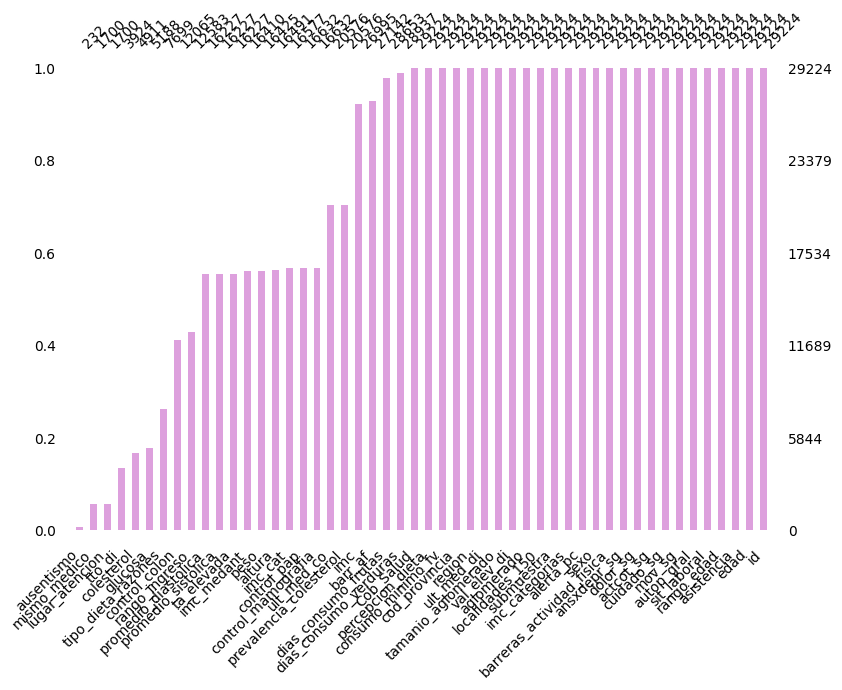

In [8]:
#Vamos a analizar de todas las variables, cuales son aquellas que tienen mayor cantidad de valores faltantes
msno.bar(df_filtrado,figsize=(9, 6), sort="ascending",fontsize=10, color='plum')

<AxesSubplot: >

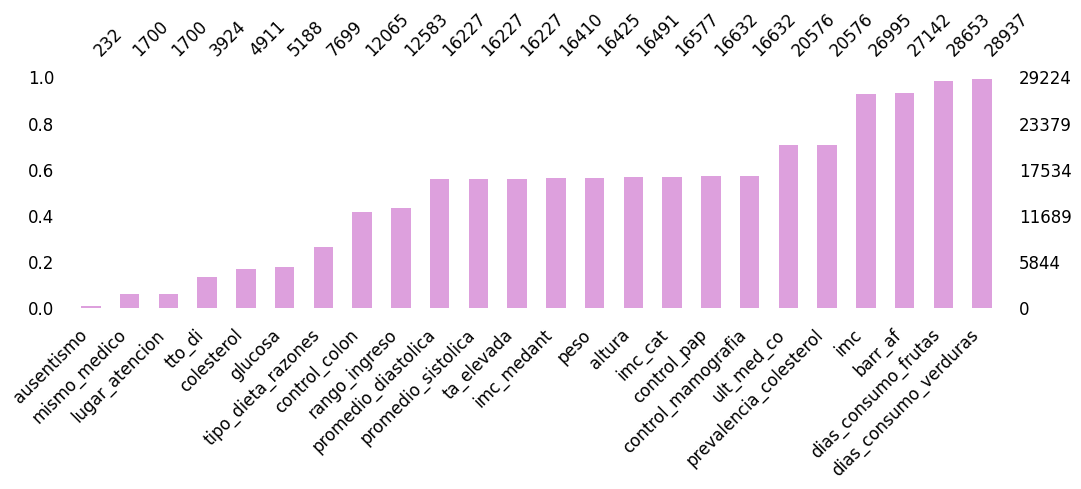

In [9]:
# Encuentra el número de registros para cada variable
num_records = df_filtrado.count()

# Identifica las variables con menos de 29,224 registros (excepto "cob_salud")
variables_a_eliminar = num_records[num_records >= 29224].index.tolist()
#variables_a_eliminar.remove('Cob_Salud')

# Filtra las variables y crea un nuevo DataFrame con las variables seleccionadas
df_filtrado_2 = df_filtrado.drop(variables_a_eliminar, axis=1)

# Ahora puedes usar msno.bar para visualizar los valores faltantes en el DataFrame filtrado
msno.bar(df_filtrado_2, figsize=(12, 3), sort="ascending", fontsize=12, color='plum')


A través del gráfico anterior podemos observar que las variables antropométricas, que consideramos pueden ser importantes para próximos trabajos, tienen una proporción de nulos muy alta. Creemos que realizar una imputación de alrededor del 50% de nuestro conjunto de datos alteraría de forma considerable los resultados, por lo que elegimos quedarnos con los casos en que tenemos información para estas variables. Una pregunta que debemos responder antes de realizar cualquier recorte es si las filas en las que faltan datos para estas variables son las mismas o están distribuidas de manera aleatoria en nuestro df. Para ello utilizaremos también un método de la librería missingno, que calcula cuánto la presencia o no de datos en una variable afecta a otra.

In [10]:
var_antro = ["promedio_sistolica", "promedio_diastolica", "ta_elevada", "imc_medant", "peso", "altura"]

<AxesSubplot: >

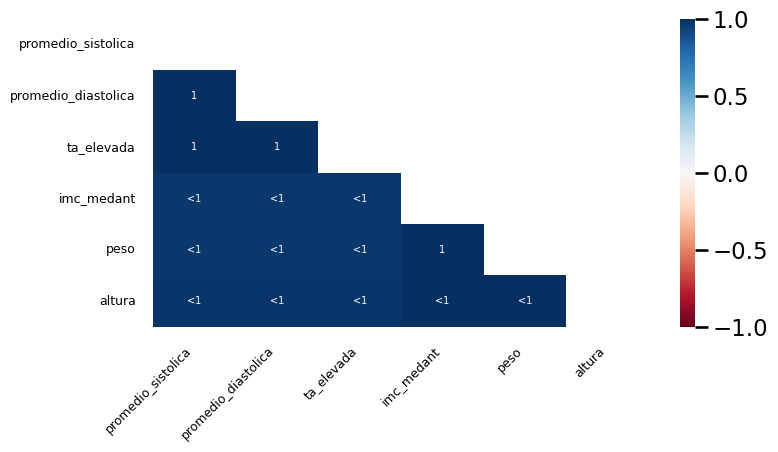

In [11]:
msno.heatmap(df_filtrado[var_antro],figsize=(8, 4), fontsize=9)

Como podemos ver la correlación de nulos es de 1 o cercana a 1 para las variables de tensión, peso y altura, lo que da cuenta de que casi para el 100% de los casos, cuando se completó una de estas variables ,también se completó el resto. Por ello eliminaremos las filas en que alguna de estas variables tenga algún nulo:

In [12]:
# se eliminan filas en que alguna de las variables del subset "var_antro" tenga un valor nulo
df_curado = df_filtrado.dropna(subset=var_antro)


In [13]:
# Eliminamos las filas que tienen nulo en las variables promedio_diastolica (la que mayor cantidad de nulos tenga) 
# con el objetivo de evitar imputarlas (imputación mayor al 50% de los datos) y evitar perderlas, para luego
# acercarnos a predicciones sobre hipertensión

print(df_filtrado['promedio_diastolica'].isna().sum())
print(df_filtrado['promedio_sistolica'].isna().sum())
print(df_filtrado['ta_elevada'].isna().sum())

# Elegimos promedio_diastolica, ya que las 3 tienen la misma cantidad de nulos
variable_decisora = 'promedio_diastolica'
df_curado = df_filtrado.dropna(subset=[variable_decisora])

12997
12997
12997


<AxesSubplot: >

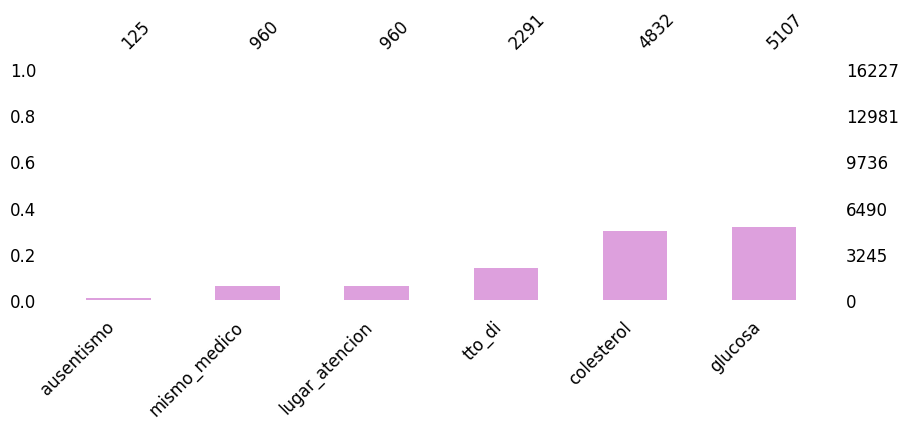

In [14]:
msno.bar(df_curado[["ausentismo", "mismo_medico","lugar_atencion","tto_di", "glucosa", "colesterol"]], figsize=(10, 3), sort="ascending", fontsize=12, color='plum')

In [15]:
#también descartamos variables que tienen una proporción de valores nulos demasiado alta

df_curado = df_curado.drop(columns=df_curado[["ausentismo", "mismo_medico", "lugar_atencion", 
                                                "tto_di", "tipo_dieta_razones", "colesterol", "glucosa",
                                                "ult_med_co", "barr_af", "prevalencia_colesterol", "control_mamografia", "control_pap", "control_colon", "rango_ingreso"]])

df_curado.columns

Index(['id', 'cod_provincia', 'region', 'tamanio_aglomerado', 'aglomerado',
       'localidades_150', 'submuestra', 'sexo', 'rango_edad', 'Cob_Salud',
       'edad', 'altura', 'peso', 'imc', 'imc_medant', 'imc_cat', 'ta_elevada',
       'promedio_sistolica', 'promedio_diastolica', 'asistencia',
       'sit_laboral', 'autop_gral', 'mov_sg', 'cuidado_sg', 'actcot_sg',
       'dolor_sg', 'ansxdepr_sg', 'barreras_actividad_fisica', 'alerta_pc',
       'imc_categorias', 'val_elev_di', 'ult_med_di', 'consumo_minimo_fv',
       'percepcion_dieta', 'dias_consumo_frutas', 'dias_consumo_verduras'],
      dtype='object')

Eliminamos algunas columnas relativas a la ubicación para quedarnos con datos cuantitativos.

In [16]:
df_curado = df_curado.drop(columns=df_curado[["cod_provincia", "region", "aglomerado", 
                                                "localidades_150", "sit_laboral"]])

df_curado.columns

Index(['id', 'tamanio_aglomerado', 'submuestra', 'sexo', 'rango_edad',
       'Cob_Salud', 'edad', 'altura', 'peso', 'imc', 'imc_medant', 'imc_cat',
       'ta_elevada', 'promedio_sistolica', 'promedio_diastolica', 'asistencia',
       'autop_gral', 'mov_sg', 'cuidado_sg', 'actcot_sg', 'dolor_sg',
       'ansxdepr_sg', 'barreras_actividad_fisica', 'alerta_pc',
       'imc_categorias', 'val_elev_di', 'ult_med_di', 'consumo_minimo_fv',
       'percepcion_dieta', 'dias_consumo_frutas', 'dias_consumo_verduras'],
      dtype='object')

In [17]:
df_curado

,id,tamanio_aglomerado,submuestra,sexo,rango_edad,Cob_Salud,edad,altura,peso,imc,...,ansxdepr_sg,barreras_actividad_fisica,alerta_pc,imc_categorias,val_elev_di,ult_med_di,consumo_minimo_fv,percepcion_dieta,dias_consumo_frutas,dias_consumo_verduras
0,1128639,1,1,1,2,2,32,181.0,106.0,3175.0,...,2,1,1,3,2,2,2,2,7.0,7.0
7,19254804,1,1,2,3,1,42,159.0,58.0,2255.0,...,1,1,2,1,2,1,2,2,6.0,7.0
8,19959160,1,1,1,2,2,32,184.0,71.0,2449.0,...,2,9,2,1,2,3,2,3,0.0,3.0
11,26474161,1,1,1,5,1,76,164.0,95.0,2937.0,...,1,9,2,2,2,1,2,2,7.0,3.0
13,28035334,1,1,2,4,1,63,168.0,86.0,2976.0,...,1,5,2,2,1,1,2,3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,2061906230,4,1,1,5,1,86,157.0,71.0,2498.0,...,1,5,2,1,1,1,2,2,7.0,7.0
29217,2067485448,4,1,1,2,1,29,173.0,85.0,2841.0,...,2,1,1,2,2,2,2,2,0.0,3.0
29220,2097771079,4,1,1,4,1,62,183.0,101.0,2778.0,...,2,9,1,2,2,2,2,2,5.0,5.0
29221,2101464264,4,1,2,5,1,74,154.0,64.0,2571.0,...,1,5,2,2,2,1,2,1,2.0,6.0


Para evitar errores que pueda traer la base, creamos una columna con el índice de masa corporal calculado de acuerdo a los datos que tenemos de peso y altura :

In [18]:
df_curado["imc_calc"] = round(df_curado["peso"] / ((df_curado["altura"]/100)**2), 1)
df_curado.drop(columns=["imc", "imc_medant"], inplace=True)

In [19]:
df_curado.isna().sum().sort_values(ascending=False)

dias_consumo_frutas          334
dias_consumo_verduras        161
imc_calc                     154
peso                         140
altura                        76
cuidado_sg                     0
percepcion_dieta               0
consumo_minimo_fv              0
ult_med_di                     0
val_elev_di                    0
imc_categorias                 0
alerta_pc                      0
barreras_actividad_fisica      0
ansxdepr_sg                    0
dolor_sg                       0
actcot_sg                      0
id                             0
tamanio_aglomerado             0
autop_gral                     0
asistencia                     0
promedio_diastolica            0
promedio_sistolica             0
ta_elevada                     0
imc_cat                        0
edad                           0
Cob_Salud                      0
rango_edad                     0
sexo                           0
submuestra                     0
mov_sg                         0
dtype: int

Ahora si,vamos a realizar la imputación de las dos variables donde todavía tenemos valores nulos "dias_consumo_frutas" y "dias_consumo_verduras". Para ello primero escalaremos un subset de la base con variables que tienen los niveles de correlación más altos:

In [20]:
corr = df_curado.corr()[['dias_consumo_frutas']].sort_values(by='dias_consumo_frutas', ascending=False)
corr


,dias_consumo_frutas
dias_consumo_frutas,1.000000
dias_consumo_verduras,0.336573
edad,0.214294
rango_edad,0.207165
sexo,0.102740
barreras_actividad_fisica,0.072484
asistencia,0.028420
imc_calc,0.023792
mov_sg,0.019667
promedio_sistolica,0.018290


Utilizaremos para la imputación las variables de sexo, edad, cobertura de salud y percepcion_dieta

In [21]:
#Creamos una copia de nuestro df para realizar un escalado de las variables que utilizaremos parar realizar una imputación por KNearestNeighbors
from sklearn.preprocessing import MinMaxScaler

df_scaled=df_curado.copy()


scale_columns = ["dias_consumo_frutas", "dias_consumo_verduras", "edad", "sexo", "Cob_Salud", "percepcion_dieta"]

def scale(var):
    reshaped = df_scaled[var].values.copy().reshape(-1,1)

    global scaler
    scaler=MinMaxScaler()

    df_scaled[var] = scaler.fit_transform(reshaped)

for col in scale_columns:
    scale(col)

df_scaled.head()

,id,tamanio_aglomerado,submuestra,sexo,rango_edad,Cob_Salud,edad,altura,peso,imc_cat,...,barreras_actividad_fisica,alerta_pc,imc_categorias,val_elev_di,ult_med_di,consumo_minimo_fv,percepcion_dieta,dias_consumo_frutas,dias_consumo_verduras,imc_calc
0,1128639,1,1,0.0,2,1.0,0.162791,181.0,106.0,3.0,...,1,1,3,2,2,2,0.010204,1.000000,1.000000,32.4
7,19254804,1,1,1.0,3,0.0,0.279070,159.0,58.0,1.0,...,1,2,1,2,1,2,0.010204,0.857143,1.000000,22.9
8,19959160,1,1,0.0,2,1.0,0.162791,184.0,71.0,1.0,...,9,2,1,2,3,2,0.020408,0.000000,0.428571,21.0
11,26474161,1,1,0.0,5,0.0,0.674419,164.0,95.0,3.0,...,9,2,2,2,1,2,0.010204,1.000000,0.428571,35.3
13,28035334,1,1,1.0,4,0.0,0.523256,168.0,86.0,3.0,...,5,2,2,1,1,2,0.020408,0.000000,0.000000,30.5


In [22]:
#imputamos los valores faltantes de consumo de frutas y verduras y los guardamos en otra variable para su comparación

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

imputed_data = df_curado.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

imputed_data[scale_columns] = imputer.fit_transform(
    imputed_data[scale_columns])

df_curado["dias_consumo_frutas_imp"] = imputed_data["dias_consumo_frutas"]

df_curado["dias_consumo_verduras_imp"] = imputed_data["dias_consumo_verduras"]

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Chequeamos imputación:

In [23]:
df_curado["dias_consumo_frutas"].compare(df_curado["dias_consumo_frutas_imp"])

,self,other
1401,NaN,0.6
1444,NaN,3.8
1632,NaN,4.8
1655,NaN,1.0
1677,NaN,2.8
...,...,...
28885,NaN,3.2
28913,NaN,2.2
28935,NaN,3.6
29100,NaN,3.6


De esta forma podemos ver que son 333 los valores diferentes entre cada variable. Es decir que los 333 valores nulos que tenía la original fueron reemplazados. Podemos entonces deshacernos de la variable anterior y ya tener un dataset sin nulos.

In [24]:
df_curado.drop(columns=["dias_consumo_frutas", "dias_consumo_verduras"], inplace=True)
df_curado.isna().sum().sort_values(ascending=False)

imc_calc                     154
peso                         140
altura                        76
id                             0
cuidado_sg                     0
dias_consumo_frutas_imp        0
percepcion_dieta               0
consumo_minimo_fv              0
ult_med_di                     0
val_elev_di                    0
imc_categorias                 0
alerta_pc                      0
barreras_actividad_fisica      0
ansxdepr_sg                    0
dolor_sg                       0
actcot_sg                      0
mov_sg                         0
tamanio_aglomerado             0
autop_gral                     0
asistencia                     0
promedio_diastolica            0
promedio_sistolica             0
ta_elevada                     0
imc_cat                        0
edad                           0
Cob_Salud                      0
rango_edad                     0
sexo                           0
submuestra                     0
dias_consumo_verduras_imp      0
dtype: int

In [25]:
# O al menos eso creíamos, nos encontramos con que existen valores nulos en "peso" y "altura", por lo que procedemos con los pasos necesarios para obtener un dataset completamente limpio.
print(df_curado['imc_calc'].isna().sum())
print(df_curado['peso'].isna().sum())
print(df_curado['altura'].isna().sum())

154
140
76


In [26]:
#Realizamos un escalado de peso, altura y del imc

df_scaled=df_curado.copy()


scale_columns = ["peso", "altura", "imc_calc"]

def scale(var):
    reshaped = df_scaled[var].values.copy().reshape(-1,1)

    global scaler
    scaler=MinMaxScaler()

    df_scaled[var] = scaler.fit_transform(reshaped)

for col in scale_columns:
    scale(col)

df_scaled.head()

,id,tamanio_aglomerado,submuestra,sexo,rango_edad,Cob_Salud,edad,altura,peso,imc_cat,...,barreras_actividad_fisica,alerta_pc,imc_categorias,val_elev_di,ult_med_di,consumo_minimo_fv,percepcion_dieta,imc_calc,dias_consumo_frutas_imp,dias_consumo_verduras_imp
0,1128639,1,1,1,2,2,32,0.770115,0.437126,3.0,...,1,1,3,2,2,2,2,0.251381,7.0,7.0
7,19254804,1,1,2,3,1,42,0.517241,0.149701,1.0,...,1,2,1,2,1,2,2,0.120166,6.0,7.0
8,19959160,1,1,1,2,2,32,0.804598,0.227545,1.0,...,9,2,1,2,3,2,3,0.093923,0.0,3.0
11,26474161,1,1,1,5,1,76,0.574713,0.371257,3.0,...,9,2,2,2,1,2,2,0.291436,7.0,3.0
13,28035334,1,1,2,4,1,63,0.620690,0.317365,3.0,...,5,2,2,1,1,2,3,0.225138,0.0,0.0


In [27]:
# Realizaremos una imputacion final para los datos de peso y altura, que afectan luego el calculo del imc
imputed_data = df_curado.copy(deep=True)

imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

imputed_data[scale_columns] = imputer.fit_transform(imputed_data[scale_columns])

df_curado["peso_imp"] = imputed_data["peso"]

df_curado["altura_imp"] = imputed_data["altura"]

df_curado["imc_calc_imp"] = imputed_data["imc_calc"]

In [28]:
df_curado.drop(columns=["peso", "altura", "imc_calc"], inplace=True)
df_curado.isna().sum().sort_values(ascending=False)

id                           0
tamanio_aglomerado           0
altura_imp                   0
peso_imp                     0
dias_consumo_verduras_imp    0
dias_consumo_frutas_imp      0
percepcion_dieta             0
consumo_minimo_fv            0
ult_med_di                   0
val_elev_di                  0
imc_categorias               0
alerta_pc                    0
barreras_actividad_fisica    0
ansxdepr_sg                  0
dolor_sg                     0
actcot_sg                    0
cuidado_sg                   0
mov_sg                       0
autop_gral                   0
asistencia                   0
promedio_diastolica          0
promedio_sistolica           0
ta_elevada                   0
imc_cat                      0
edad                         0
Cob_Salud                    0
rango_edad                   0
sexo                         0
submuestra                   0
imc_calc_imp                 0
dtype: int64

In [30]:
df_curado.to_csv('df_curado.csv', index=False)

NameError: name 'df_final' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a494fb28-1b79-424b-8bed-a59fefb55232' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>